<a href="https://colab.research.google.com/github/FadzararAI/GoogleSolution/blob/monitoring/Tomatoes_UGN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Google Solution Challenge - UrbanGreenNest

# Drive Mounting

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive/')

Mounted at /content/drive/


# Model prepraration

In [ ]:
pip install numpy pandas matplotlib tensorflow

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Activation,Flatten,Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Dataset augmentation creation (train and validation)

In [ ]:
# Image preprocessing using Image Augmentation (40% for validation)
train_data = ImageDataGenerator(rescale=1./255,validation_split=0.4,rotation_range=20,horizontal_flip=True,shear_range=0.2,fill_mode='wrap')

In [ ]:
# Creates training data
train_gen = train_data.flow_from_directory('/content/drive/My Drive/Colab Notebooks/tomatoesripe/train', target_size=(100,150),class_mode='categorical',subset='training')
# Creates validation data
valid_gen = train_data.flow_from_directory('/content/drive/My Drive/Colab Notebooks/tomatoesripe/val', target_size=(100,150),class_mode='categorical',subset='validation')

Found 2136 images belonging to 2 classes.
Found 158 images belonging to 2 classes.


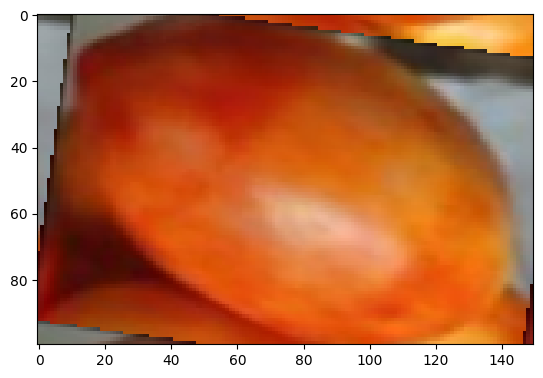

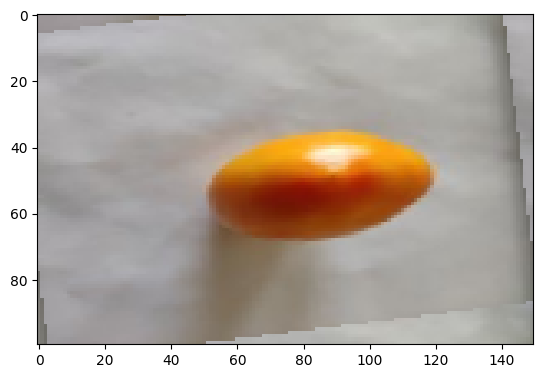

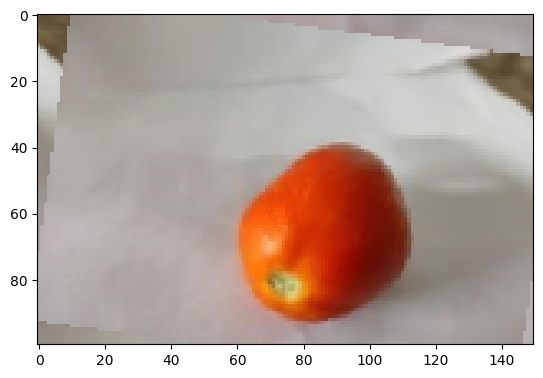

In [ ]:
# Training dataset overview
for _ in range(3):
  img, label = train_gen.next()
  plt.imshow(img[0])
  plt.show()

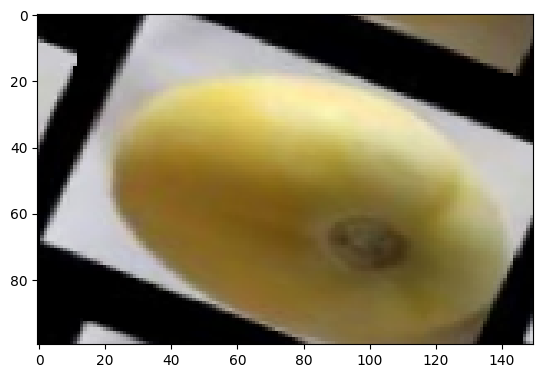

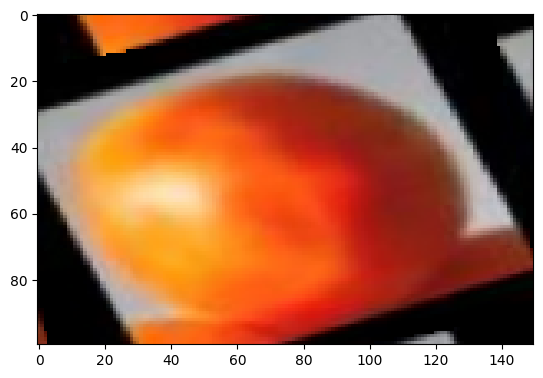

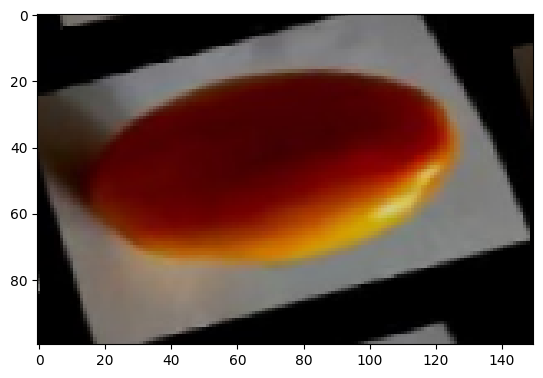

In [ ]:
# Validation dataset overview
for _ in range(3):
  img, label = valid_gen.next()
  plt.imshow(img[0])
  plt.show()

## Classification model creation

In [ ]:
inshape = (100,150,3)

In [ ]:
rpsmodel = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),activation = 'relu', input_shape=inshape),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32,(3,3),activation = 'relu', input_shape=inshape),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32,(3,3),activation = 'relu', input_shape=inshape),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(2, activation='softmax'),
])

In [ ]:
rpsmodel.compile(optimizer=Adam(), loss="categorical_crossentropy", metrics=['accuracy'])

In [ ]:
rpsmodel.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 98, 148, 32)       896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 49, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 47, 72, 32)        9248      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 23, 36, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 21, 34, 32)        9248      
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 10, 17, 32)       

In [ ]:
rpsmodel.fit(train_gen,validation_data=valid_gen,verbose=2,epochs=30,steps_per_epoch=25,validation_steps=5)

Epoch 1/30
25/25 - 26s - loss: 0.4472 - accuracy: 0.7975 - val_loss: 0.0396 - val_accuracy: 0.9937 - 26s/epoch - 1s/step
Epoch 2/30
25/25 - 24s - loss: 0.0675 - accuracy: 0.9785 - val_loss: 0.0264 - val_accuracy: 0.9937 - 24s/epoch - 966ms/step
Epoch 3/30
25/25 - 25s - loss: 0.0397 - accuracy: 0.9887 - val_loss: 0.0525 - val_accuracy: 0.9873 - 25s/epoch - 989ms/step
Epoch 4/30
25/25 - 26s - loss: 0.0360 - accuracy: 0.9900 - val_loss: 0.0596 - val_accuracy: 0.9873 - 26s/epoch - 1s/step
Epoch 5/30
25/25 - 23s - loss: 0.0264 - accuracy: 0.9962 - val_loss: 0.1077 - val_accuracy: 0.9684 - 23s/epoch - 908ms/step
Epoch 6/30
25/25 - 24s - loss: 0.0223 - accuracy: 0.9950 - val_loss: 0.0495 - val_accuracy: 0.9937 - 24s/epoch - 951ms/step
Epoch 7/30
25/25 - 24s - loss: 0.0515 - accuracy: 0.9874 - val_loss: 0.1692 - val_accuracy: 0.9304 - 24s/epoch - 967ms/step
Epoch 8/30
25/25 - 25s - loss: 0.0263 - accuracy: 0.9912 - val_loss: 0.1476 - val_accuracy: 0.9620 - 25s/epoch - 997ms/step
Epoch 9/30
25/

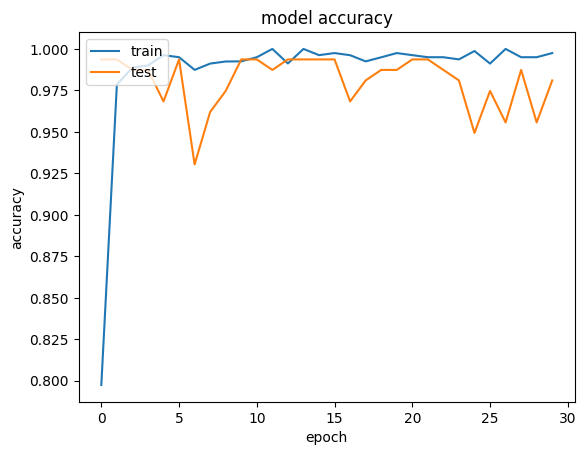

In [ ]:
plt.plot(rpsmodel.history.history["accuracy"])
plt.plot(rpsmodel.history.history["val_accuracy"])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

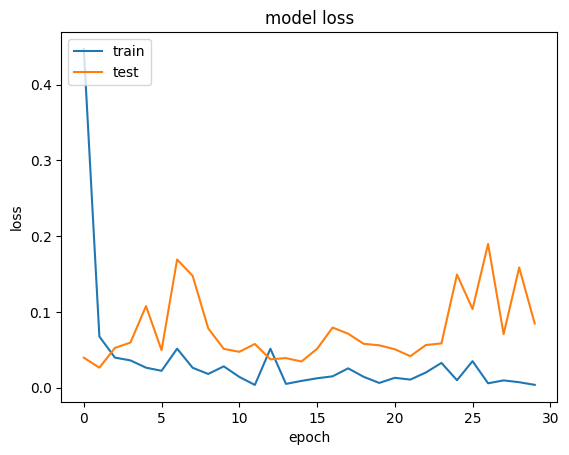

In [ ]:
plt.plot(rpsmodel.history.history['loss'])
plt.plot(rpsmodel.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Testing the model by predicting few images

In [ ]:
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing import image
from google.colab import files
%matplotlib inline

In [ ]:
train_gen.class_indices

{'Ripe': 0, 'Unripe': 1}

In [ ]:
def imgpred(fileupload):
  for fn in fileupload.keys():

    # predicting images
    path = fn
    img = image.load_img(path, target_size=(100,150))

    imgplot = plt.imshow(img)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])

    classes = rpsmodel.predict(images, batch_size=10)
    if np.argmax(classes) == 0:
      print("Ripe")
    elif np.argmax(classes) == 1:
      print("Unripe")

In [ ]:
image1 = files.upload()

Saving tomatoes_helios4eos_gettyimages-edit.jpg to tomatoes_helios4eos_gettyimages-edit.jpg


In [ ]:
image2 = files.upload()

Saving iStock-831145798_crop.jpg to iStock-831145798_crop.jpg


In [ ]:
image3 = files.upload()

Saving when-to-pick-tomatoes.jpg to when-to-pick-tomatoes (3).jpg


1/1 [==============================] - 0s 151ms/step
Ripe


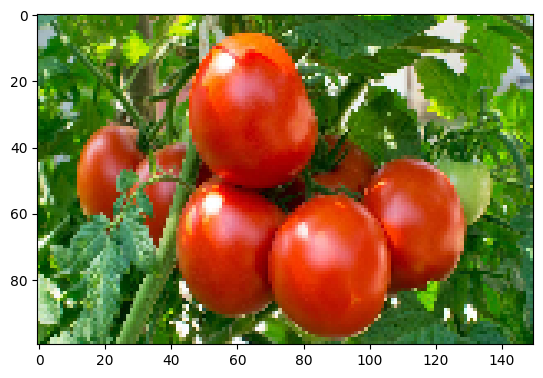

In [ ]:
imgpred(image1)

1/1 [==============================] - 0s 28ms/step
Unripe


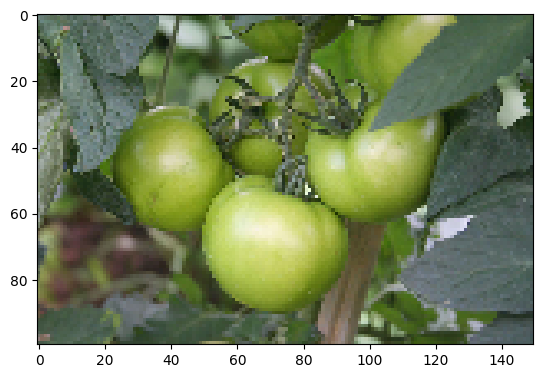

In [ ]:
imgpred(image2)

1/1 [==============================] - 0s 42ms/step
Unripe


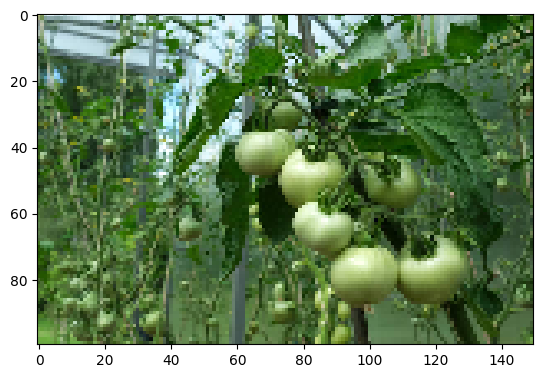

In [ ]:
imgpred(image3)